In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# Data Cleaning

In [ ]:
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace= True)
df.sample(5)

,v1,v2
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...
4818,ham,Got smaller capacity one? Quite ex...
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.l..."
3021,ham,How dare you change my ring
3277,ham,What happened in interview?


In [ ]:
df.rename(columns= {'v1' :'target', 'v2': 'text'}, inplace=True)
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [ ]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
# checking for missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# checking for duplicates
df.duplicated().sum()

403

In [ ]:
# removing duplicates
df = df.drop_duplicates(keep= 'first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#  EDA

In [ ]:
import matplotlib.pyplot as plt

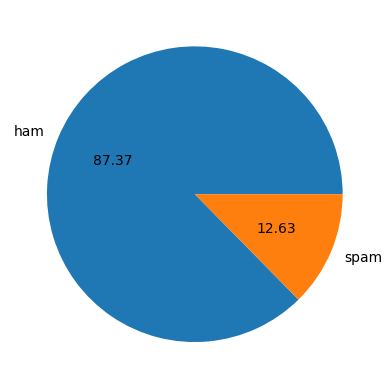

In [ ]:
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct='%0.2f');

In [ ]:
df['num_of_chars'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

,text
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [ ]:
df['num_of_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head(3)

,target,text,num_of_chars,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [ ]:
df['num_of_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head(3)

,target,text,num_of_chars,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [ ]:
df[['num_of_chars' ,'num_of_words', 'num_of_sentences']].describe()

,num_of_chars,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham messages
df[df['target']==0][['num_of_chars',	'num_of_words', 'num_of_sentences']].describe()

,num_of_chars,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam message
df[df['target'] == 1][['num_of_chars',	'num_of_words', 'num_of_sentences']].describe()


,num_of_chars,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_of_chars', ylabel='Count'>

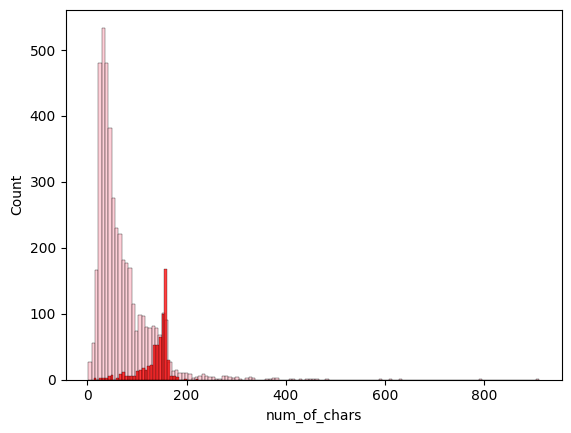

In [ ]:
sns.histplot(df[df['target']==0]['num_of_chars'], color='pink')
sns.histplot(df[df['target'] == 1]['num_of_chars'], color='red')


<Axes: xlabel='num_of_words', ylabel='Count'>

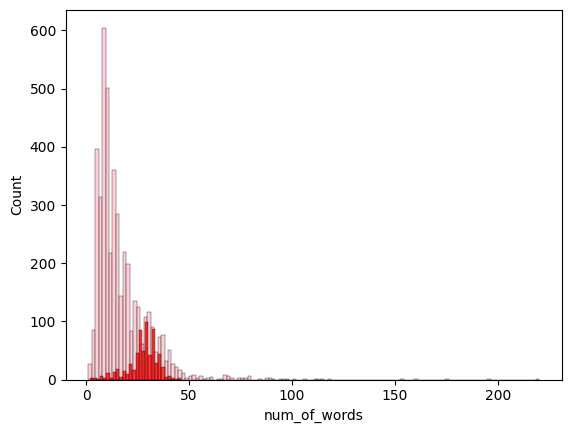

In [ ]:
sns.histplot(df[df['target']==0]['num_of_words'], color='pink')
sns.histplot(df[df['target'] == 1]['num_of_words'], color='red')


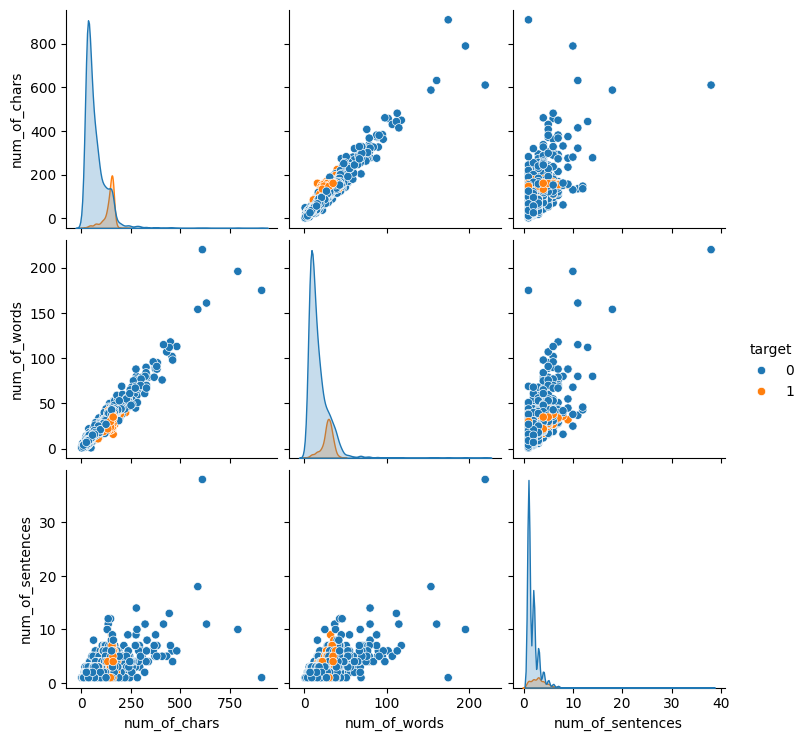

In [ ]:
sns.pairplot(df, hue='target');

In [ ]:
df['text'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### function for text preprocessing steps

In [ ]:
def transform_text(text):
  text = text.lower()  # convert to lower case
  text = nltk.word_tokenize(text)  # tokenize the text

# remove non alpha numeric characters i.e., removes punctuation and special characters
  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()


# remove stopwords and punctuation
  for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

  text = y[:]
  y.clear()

# stemming
  for i in text:
    y.append(ps.stem(i))

# JOIN tokens back into a single string
  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer

ps =PorterStemmer()

In [ ]:
ps.stem('smiled')

'smile'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_of_chars,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

wc =WordCloud(width=500, height=500, min_font_size=10,
              background_color= 'white')

#### Word cloud -- useful for visualizing the most common words in that subset of text data.

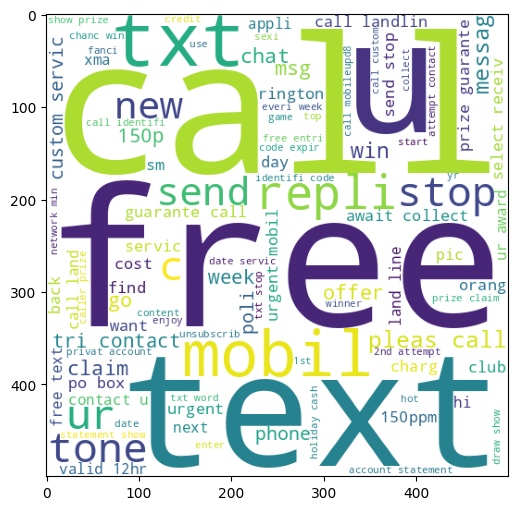

In [ ]:
#  generate a word cloud from the concatenated string

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
# concatenates all the text entries in the transformed_text column into a single string,
# with each entry separated by a space
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

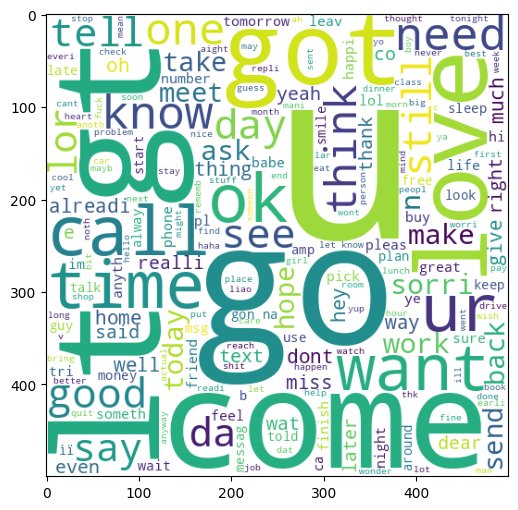

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize= (15,6))
plt.imshow(ham_wc);

In [ ]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter

In [ ]:
spam_data =pd.DataFrame(Counter(spam_corpus).most_common(30))

spam_data.rename(columns= {0: 'word', 1: 'frequency'}, inplace=True)
spam_data

,word,frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


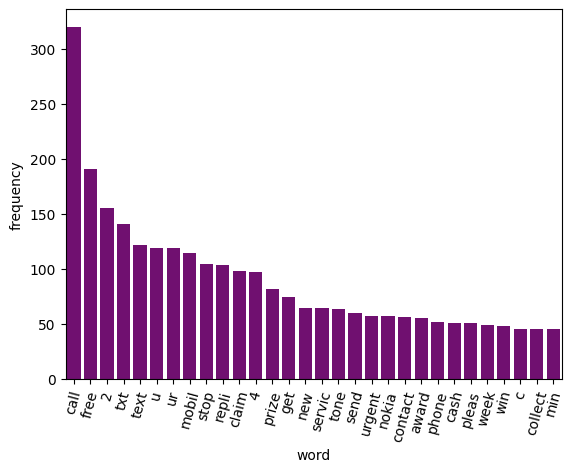

In [ ]:
sns.barplot(x='word', y='frequency', data=spam_data, color='purple')
plt.xticks(rotation=75)
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

35404

In [ ]:
ham_data =pd.DataFrame(Counter(ham_corpus).most_common(30))

ham_data.rename(columns={0: 'word', 1: 'frequency'}, inplace=True)

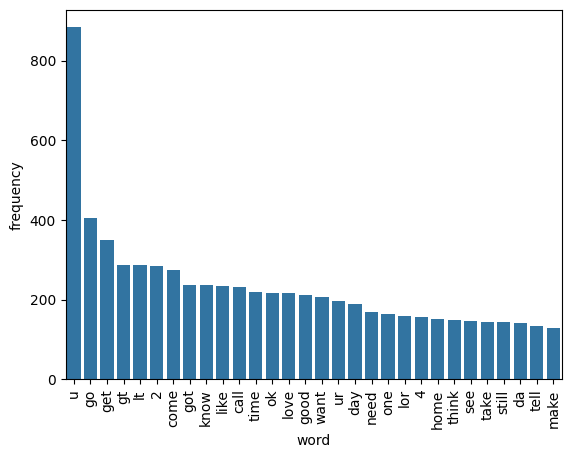

In [ ]:
sns.barplot(x='word', y='frequency', data=ham_data)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv =CountVectorizer()
tfidf =TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y =df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9835589941972921
[[903   0]
 [ 17 114]]
1.0


In [ ]:
bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.988394584139265
[[901   2]
 [ 10 121]]
0.983739837398374
